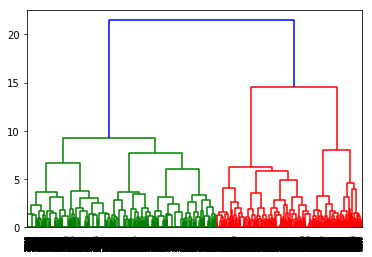

In [147]:
import numpy as np
import mysql.connector
import scipy.signal as signal
from matplotlib.pyplot import show
import matplotlib.pyplot as plt
import scipy
import scipy.spatial.distance as distance
from scipy.cluster.hierarchy import linkage, dendrogram, ward,cut_tree
from random import random
import math
#np.set_printoptions(threshold=np.inf)

connector = mysql.connector.connect(host='localhost',db='agent_analysis',user='root',password='admin')
cursor = connector.cursor(buffered=True)

sql = "SELECT result_soc_t1,result_soc_t2,result_soc_t3,result_soc_t4,result_soc_t5,result_org_t1,result_org_t2,result_org_t3,result_org_t4,result_org_t5 FROM hand_simu_logs"

sql = "SELECT * FROM hand_simu_logs"



num=cursor.execute(sql)
data_base = np.array(cursor.fetchall())
data = data_base[:,135:145].astype(np.double)

cursor.close()
connector.close()

#dArray1 = distance.pdist(data, metric = 'chebyshev')
#print(dArray1)
result1 = linkage(data, method='ward')
dendrogram(result1)
show()

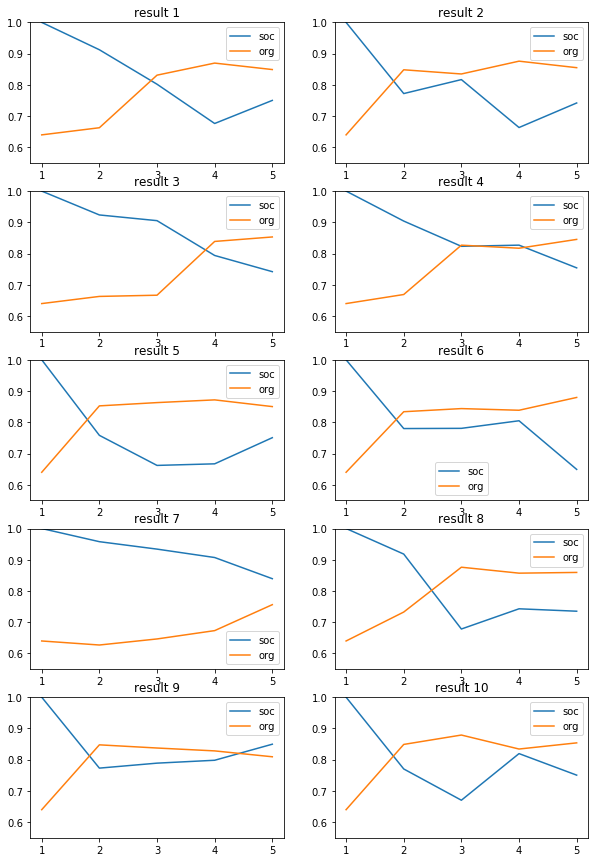

[[1 4]
 [1 4]
 [1 4]
 [1 4]
 [1 4]
 [1 4]]


In [148]:
#結果の分類
div_n1 = 10

np.set_printoptions(threshold=np.inf)
joint = np.concatenate((data, cut_tree(result1, div_n1)), axis=1)
#np.where(joint[:,10]==0)
plt.clf()
plt.figure(figsize=(10, 3*math.ceil(div_n1/2)))

for n in range(div_n1):
    joint_d = joint[joint[:,10]==n]
    plt.subplot(math.ceil(div_n1/2), 2, n+1)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[:5],label='soc')
    plt.plot(range(1,6),np.average(joint_d, axis=0)[5:10],label='org')
    plt.title("result " + str(n+1))
    plt.ylim(0.55,1.0)
    plt.legend()
plt.show()

check = np.concatenate((data_base[:,145:146], cut_tree(result1, div_n1)), axis=1).astype(np.int64)
print(check[check[:,0]==1])

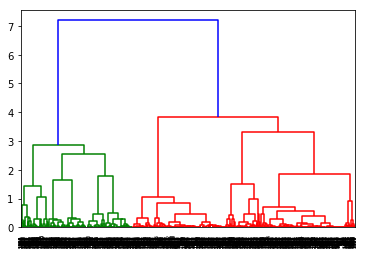

In [153]:
#特定結果の1人だけの分類
num=1

base_colmun=15+(num-1)*45
data = data_base[:,base_colmun+5:base_colmun+30].astype(np.double)
data = np.concatenate((data, cut_tree(result1, div_n1)), axis=1)
data = data[data[:,25]==0]

data_act = data_base[:,base_colmun:base_colmun+5].astype(np.str)
data_act = np.concatenate((data_act, cut_tree(result1, div_n1)), axis=1)
data_act = data_act[data_act[:,5]=='0']

result2 = linkage(data[:,0:25], method='ward')
dendrogram(result2)
show()

In [5]:
div_n2 = 3

np.set_printoptions(threshold=np.inf)
joint = np.concatenate((data, cut_tree(result2, div_n2)), axis=1)

joint_act =  np.concatenate((data_act, cut_tree(result2, div_n2)), axis=1)




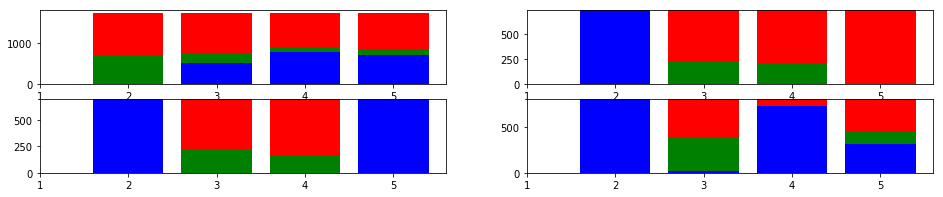

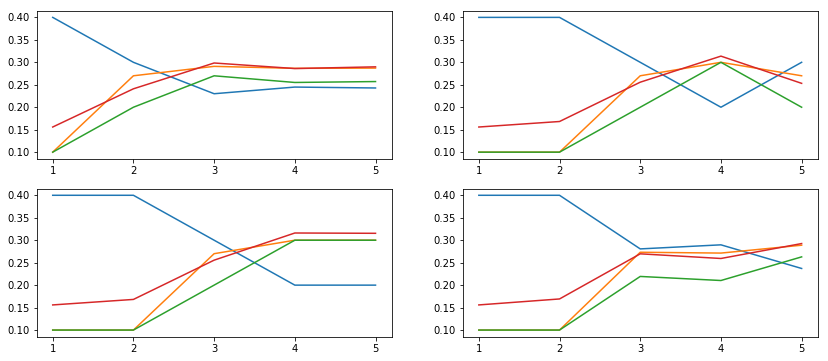

In [6]:
div_n2 = 4

np.set_printoptions(threshold=np.inf)
joint = np.concatenate((data, cut_tree(result2, div_n2)), axis=1)

joint_act =  np.concatenate((data_act, cut_tree(result2, div_n2)), axis=1)

plt.clf()
plt.figure(figsize=(16, 1.5*math.ceil(div_n2/2)))

for n in range(div_n2):
    plt.subplot(2, 2, n+1)
    joint_act_d = joint_act[joint_act[:,6]==str(n)]

    X = range(2,6)
    Y1 = np.sum(joint_act_d[:,1:5]=='維持', axis=0)
    Y2 = np.sum(joint_act_d[:,1:5]=='模倣', axis=0)
    Y3 = np.sum(joint_act_d[:,1:5]=='探索', axis=0)

    plt.bar(X, Y3, color='r', bottom=(Y1+Y2), align="center")
    plt.bar(X, Y2, color='g', bottom=Y1, align="center")
    plt.bar(X, Y1, color='b',  align="center")
    plt.xticks([1,2,3,4,5])


plt.show()


plt.clf()
plt.figure(figsize=(14, 3*math.ceil(div_n2/2)))


for n in range(div_n2):
    joint_d = joint[joint[:,26]==n]
    plt.subplot(math.ceil(div_n2/2), 2, n+1)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[:5])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[5:10])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[10:15])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[15:20])
    plt.xticks([1,2,3,4,5])
plt.show()

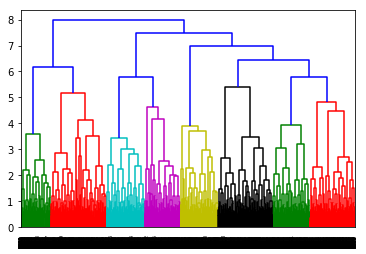

In [4]:
target_result = 1

#特定結果の全員の分類
data = np.concatenate((data_base[:,20:45], data_base[:,65:90],data_base[:,110:135]), axis=1).astype(np.double)
data = np.concatenate((data, cut_tree(result1, div_n1)), axis=1)
data = data[data[:,75]==target_result].astype(np.double)

#意思決定可視化のための抽出
data_act = np.concatenate((data_base[:,15:20], data_base[:,60:65],data_base[:,105:110]), axis=1).astype(np.str)
data_act = np.concatenate((data_act, cut_tree(result1, div_n1)), axis=1)
data_act = data_act[data_act[:,15]==str(target_result)]

#決定木作成のための可視化
data_tree = np.concatenate((data_base[:,15:20], data_base[:,60:65],data_base[:,105:110]), axis=1).astype(np.str)
data_tree = np.concatenate((data_tree, cut_tree(result1, div_n1)), axis=1)
data_tree = data_tree[data_tree[:,15]==str(target_result)]

result3 = linkage(data, method='ward')
dendrogram(result3)
show()

[[1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]]


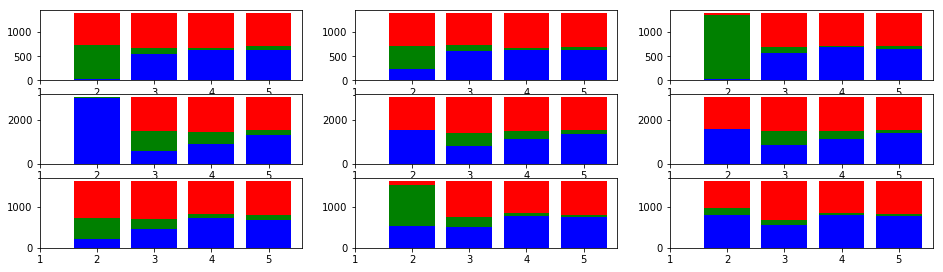

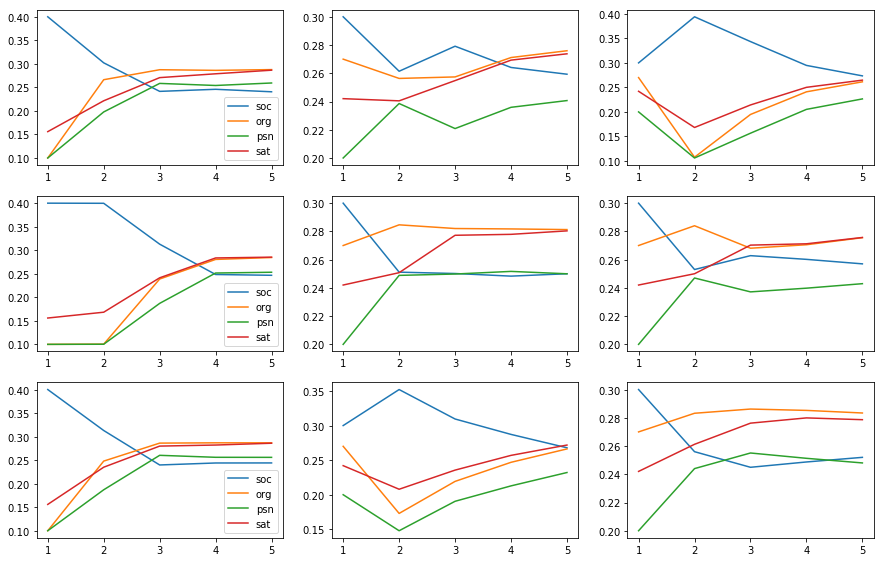

In [98]:
div_n3 = 3

joint =  np.concatenate((data, cut_tree(result3, div_n3)), axis=1)
joint_act =  np.concatenate((data_act, cut_tree(result3, div_n3)), axis=1)
data_tree =  np.concatenate((data_tree, cut_tree(result3, div_n3)), axis=1)

check_d = np.concatenate((check, cut_tree(result1, div_n1)), axis=1).astype(np.int64)
print(check_d[check_d[:,0]==1])

plt.clf()
plt.figure(figsize=(16, 3*div_n3))

for n in range(div_n3):
    joint_act_d = joint_act[joint_act[:,16]==str(n)]

    plt.subplot(3*math.ceil(div_n3/2), 3, 3*n+1)
    X = range(2,6)
    Y1 = np.sum(joint_act_d[:,1:5]=='conserve', axis=0)
    Y2 = np.sum(joint_act_d[:,1:5]=='modify', axis=0)
    Y3 = np.sum(joint_act_d[:,1:5]=='search', axis=0)
    plt.bar(X, Y3, color='r', bottom=(Y1+Y2), align="center")
    plt.bar(X, Y2, color='g', bottom=Y1, align="center")
    plt.bar(X, Y1, color='b',  align="center")
    plt.xticks([1,2,3,4,5])

    plt.subplot(3*math.ceil(div_n3/2), 3, 3*n+2)
    X = range(2,6)
    Y1 = np.sum(joint_act_d[:,6:10]=='conserve', axis=0)
    Y2 = np.sum(joint_act_d[:,6:10]=='modify', axis=0)
    Y3 = np.sum(joint_act_d[:,6:10]=='search', axis=0)
    plt.bar(X, Y3, color='r', bottom=(Y1+Y2), align="center")
    plt.bar(X, Y2, color='g', bottom=Y1, align="center")
    plt.bar(X, Y1, color='b',  align="center")
    plt.xticks([1,2,3,4,5])
    
    plt.subplot(3*math.ceil(div_n3/2), 3, 3*n+3)
    X = range(2,6)
    Y1 = np.sum(joint_act_d[:,11:15]=='conserve', axis=0)
    Y2 = np.sum(joint_act_d[:,11:15]=='modify', axis=0)
    Y3 = np.sum(joint_act_d[:,11:15]=='search', axis=0)
    plt.bar(X, Y3, color='r', bottom=(Y1+Y2), align="center")
    plt.bar(X, Y2, color='g', bottom=Y1, align="center")
    plt.bar(X, Y1, color='b',  align="center")
    plt.xticks([1,2,3,4,5])
    
plt.show()


plt.clf()
plt.figure(figsize=(15, 10*math.ceil(div_n3/2)))


for n in range(div_n3):
    joint_d = joint[joint[:,76]==n]
    plt.subplot(3*math.ceil(div_n3/2), 3, 3*n+1)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[0:5],label='soc')
    plt.plot(range(1,6),np.average(joint_d, axis=0)[5:10],label='org')
    plt.plot(range(1,6),np.average(joint_d, axis=0)[10:15],label='psn')
    plt.plot(range(1,6),np.average(joint_d, axis=0)[15:20],label='sat')
    plt.legend()

    plt.subplot(3*math.ceil(div_n3/2), 3, 3*n+2)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[25:30])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[30:35])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[35:40])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[40:45])
    
    plt.subplot(3*math.ceil(div_n3/2), 3, 3*n+3)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[50:55])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[55:60])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[60:65])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[65:70])
    
    plt.xticks([1,2,3,4,5])
plt.show()

#意思決定のファイル出力
np.savetxt('test.csv', data_tree,delimiter=',',fmt='%s')

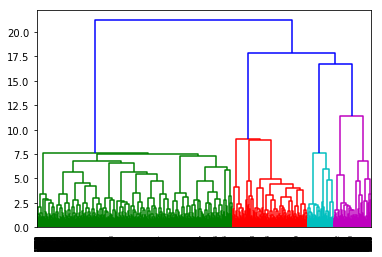

In [146]:
#プロセスから結果の分類
import numpy as np
import mysql.connector
import scipy.signal as signal
from matplotlib.pyplot import show
import matplotlib.pyplot as plt
import scipy
import scipy.spatial.distance as distance
from scipy.cluster.hierarchy import linkage, dendrogram, ward,cut_tree
from random import random
import math
#np.set_printoptions(threshold=np.inf)

connector = mysql.connector.connect(host='localhost',db='agent_analysis',user='root',password='admin')
cursor = connector.cursor(buffered=True)

sql = "SELECT result_soc_t1,result_soc_t2,result_soc_t3,result_soc_t4,result_soc_t5,result_org_t1,result_org_t2,result_org_t3,result_org_t4,result_org_t5 FROM hand_simu_logs"

sql = "SELECT * FROM hand_simu_logs"



num=cursor.execute(sql)
data_base = np.array(cursor.fetchall())
data = np.concatenate((data_base[:,20:45], data_base[:,65:90],data_base[:,110:135]), axis=1).astype(np.double)

cursor.close()
connector.close()

#dArray1 = distance.pdist(data, metric = 'chebyshev')
#print(dArray1)
result1 = linkage(data, method='ward')
dendrogram(result1)
show()

In [137]:
div_n1 = 20

joint =  np.concatenate((data, cut_tree(result1, div_n1)), axis=1)

check_d = np.concatenate((check, cut_tree(result1, div_n1)), axis=1).astype(np.int64)
print(check_d[check_d[:,0]==1])




plt.clf()
plt.figure(figsize=(15, 10*math.ceil(div_n1/2)))


for n in range(div_n1):
    joint_d = joint[joint[:,75]==n]
    plt.subplot(3*math.ceil(div_n1/2), 3, 3*n+1)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[0:5],label='soc')
    plt.plot(range(1,6),np.average(joint_d, axis=0)[5:10],label='org')
    plt.plot(range(1,6),np.average(joint_d, axis=0)[10:15],label='psn')
    plt.plot(range(1,6),np.average(joint_d, axis=0)[15:20],label='sat')
    plt.legend()

    plt.subplot(3*math.ceil(div_n1/2), 3, 3*n+2)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[25:30])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[30:35])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[35:40])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[40:45])
    
    plt.subplot(3*math.ceil(div_n1/2), 3, 3*n+3)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[50:55])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[55:60])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[60:65])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[65:70])
    
    plt.xticks([1,2,3,4,5])
plt.show()

[[1 4 6]
 [1 4 6]
 [1 4 6]
 [1 4 6]
 [1 4 6]
 [1 4 6]]


IndexError: index 75 is out of bounds for axis 1 with size 11

[[ 1 17]
 [ 1 17]
 [ 1 17]
 [ 1 17]
 [ 1 17]
 [ 1 17]]
17
429


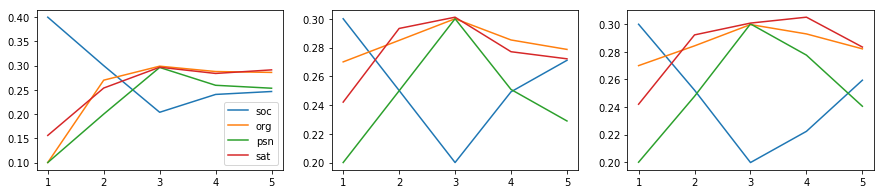

In [147]:
div_n1 = 30

joint =  np.concatenate((data, cut_tree(result1, div_n1)), axis=1)

check_d = np.concatenate((data_base[:,145:146], cut_tree(result1, div_n1)), axis=1).astype(np.int64)
print(check_d[check_d[:,0]==1])

n=check_d[check_d[:,0]==1][0,1]

print(n)

plt.clf()
plt.figure(figsize=(15, 10))



joint_d = joint[joint[:,75]==n]
print(len(joint_d))
plt.subplot(3, 3, 1)
plt.plot(range(1,6),np.average(joint_d, axis=0)[0:5],label='soc')
plt.plot(range(1,6),np.average(joint_d, axis=0)[5:10],label='org')
plt.plot(range(1,6),np.average(joint_d, axis=0)[10:15],label='psn')
plt.plot(range(1,6),np.average(joint_d, axis=0)[15:20],label='sat')
plt.legend()

plt.subplot(3, 3, 2)
plt.plot(range(1,6),np.average(joint_d, axis=0)[25:30])
plt.plot(range(1,6),np.average(joint_d, axis=0)[30:35])
plt.plot(range(1,6),np.average(joint_d, axis=0)[35:40])
plt.plot(range(1,6),np.average(joint_d, axis=0)[40:45])
    
plt.subplot(3, 3, 3)
plt.plot(range(1,6),np.average(joint_d, axis=0)[50:55])
plt.plot(range(1,6),np.average(joint_d, axis=0)[55:60])
plt.plot(range(1,6),np.average(joint_d, axis=0)[60:65])
plt.plot(range(1,6),np.average(joint_d, axis=0)[65:70])
    
plt.xticks([1,2,3,4,5])
plt.show()

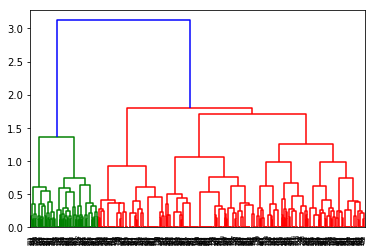

In [148]:
target_process = 24

#特定結果の全員の分類
data2 = data_base[:,135:145].astype(np.double)
data2 = np.concatenate((data2, cut_tree(result1, div_n1)), axis=1)
data2 = data2[data2[:,10]==target_process].astype(np.double)

#意思決定可視化のための抽出
data_act = np.concatenate((data_base[:,15:20], data_base[:,60:65],data_base[:,105:110]), axis=1).astype(np.str)
data_act = np.concatenate((data_act, cut_tree(result1, div_n1)), axis=1)
data_act = data_act[data_act[:,15]==str(target_process)]

result3 = linkage(data2, method='ward')
dendrogram(result3)
show()

check2 = check_d[check_d[:,1]==target_process]


0:136
1:164
2:103
3:101


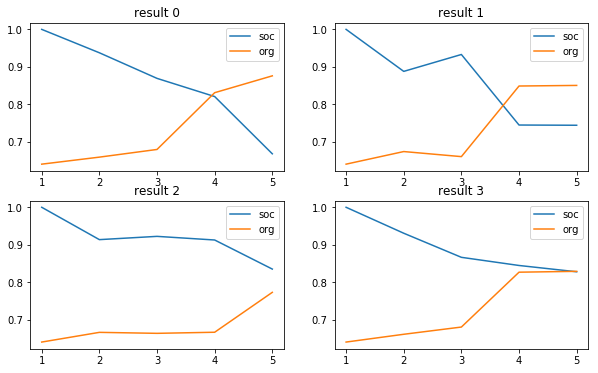

[]


In [149]:
#結果の分類
div_n2 = 4

np.set_printoptions(threshold=np.inf)
joint = np.concatenate((data2, cut_tree(result3, div_n2)), axis=1)
joint_act = np.concatenate((data_act, cut_tree(result3, div_n2)), axis=1)

#np.where(joint[:,10]==0)
plt.clf()
plt.figure(figsize=(10, 3*math.ceil(div_n2/2)))

for n in range(div_n2):
    joint_d = joint[joint[:,11]==n]
    print(str(n) + ":" + str(len(joint_d)))
    plt.subplot(math.ceil(div_n2/2), 2, n+1)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[:5],label='soc')
    plt.plot(range(1,6),np.average(joint_d, axis=0)[5:10],label='org')
    plt.title("result " + str(n))
    plt.legend()
plt.show()

check2 = np.concatenate((check2, cut_tree(result3, div_n2)), axis=1).astype(np.int64)
print(check2[check2[:,0]==1])

#意思決定のファイル出力
np.savetxt('test.csv', joint_act,delimiter=',',fmt='%s')

In [150]:
target_process = 17
target_result = 0

data_extract = np.concatenate((data_base, cut_tree(result1, div_n1)), axis=1)
data_extract = data_extract[data_extract[:,len(data_extract[0])-1]==str(target_process)]
data_extract = np.concatenate((data_extract, cut_tree(result3, div_n2)), axis=1)
data_extract = data_extract[data_extract[:,len(data_extract[0])-1]==str(target_result)]

np.savetxt('test2.csv', data_extract,delimiter=',',fmt='%s')

ValueError: all the input array dimensions except for the concatenation axis must match exactly

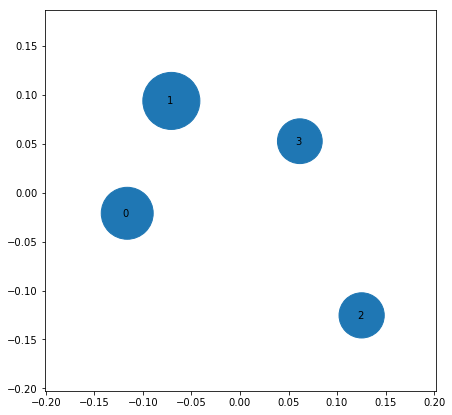

     , 0.14, 0.28, 0.17,
     ,     , 0.28, 0.16,
     ,     ,     , 0.19,
     ,     ,     ,     ,


In [151]:
from sklearn import manifold

div_n2=4
data_ave = []
mark_size = []
for n in range(div_n2):
    joint_d = joint[joint[:,11]==n]
    data_ave.append(np.average(joint_d, axis=0)[:10])
    mark_size.append(10000*(len(joint_d)/len(joint)))
    
dist_m = distance.pdist(data_ave)


mds = manifold.MDS(n_components=2, dissimilarity="euclidean", random_state=6)

pos = mds.fit_transform(data_ave)

plt.clf()
plt.figure(figsize=(7, 7))
plt.scatter(pos[:, 0], pos[:, 1],s=mark_size, marker = 'o')
 
for label, x, y in zip(range(div_n2), pos[:, 0], pos[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (2, -5),
        textcoords = 'offset points', ha = 'right', va = 'bottom')
 
plt.show()

count = 0
for n in range(div_n2):
    for m in range(n+1):
        print('     ,', end='')
        
    for l in range(div_n2-n-1):
        print(" " + str(('%03.2f' % dist_m[count]))+',',end='')
        count = count+1
        
    print('')

In [ ]:
from sklearn import manifold

data_macro_ave = []
data_micro_ave = []
mark_size = []
for n in range(div_n):
    joint_macro_d = joint_macro[joint_macro[:,10]==n]
    data_macro_ave.append(np.average(joint_macro_d, axis=0)[:10])
    mark_size.append(10000*(len(joint_macro_d)/len(joint_macro)))

    joint_micro_d = joint_micro[joint_micro[:,75]==n]
    data_micro_ave.append(np.average(joint_micro_d, axis=0)[:75])
    
dist_micro = distance.squareform(distance.pdist(data_micro_ave))
dist_macro = distance.squareform(distance.pdist(data_macro_ave))

plt.clf()
plt.figure(figsize=(7, 7))
plt.scatter(dist_micro[target], dist_macro[target],s=mark_size, marker = 'o')
 
for label, x, y in zip(range(div_n), dist_micro[target], dist_macro[target]):
   plt.annotate(
       label,
       xy = (x, y), xytext = (2, -5),
       textcoords = 'offset points', ha = 'right', va = 'bottom')
plt.show()

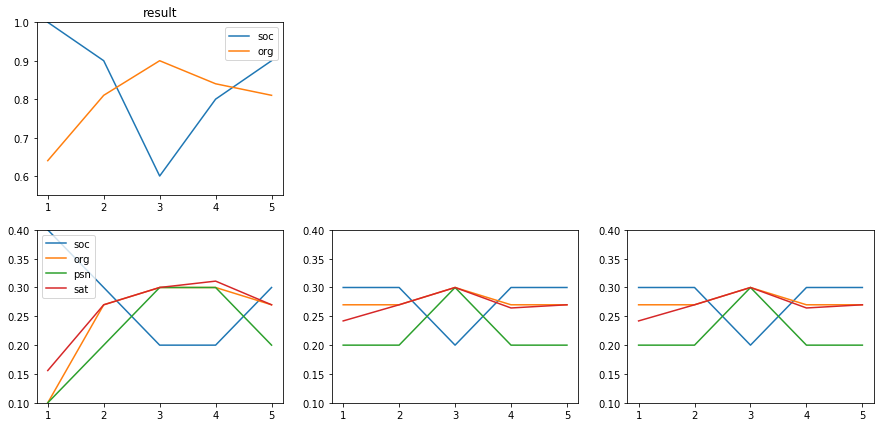

['0' 'search' 'search' 'conserve' 'search']
['0' 'conserve' 'search' 'search' 'conserve']
['0' 'conserve' 'search' 'search' 'conserve']


In [130]:
#１つのログを表示
connector = mysql.connector.connect(host='localhost',db='agent_analysis',user='root',password='admin')
cursor = connector.cursor(buffered=True)

sql = "select * from hand_simu_logs where result_org_t2 = 0.87 and result_org_t3 = 0.9 and result_org_t4 = 0.9 limit 6,1"
sql = "select * from hand_simu_logs where result_org_t2 = 0.81and result_org_t3 = 0.9 and result_org_t4 = 0.84 and result_org_t5 = 0.81 and 3_sat_t4=0.764477047 limit 1"


num=cursor.execute(sql)
data_one = np.array(cursor.fetchall())[0]

cursor.close()
connector.close()

plt.clf()
plt.figure(figsize=(15, 7))

plt.subplot(2, 3, 1)
plt.plot(range(1,6),data_one[135:140],label='soc')
plt.plot(range(1,6),data_one[140:145],label='org')
plt.ylim(0.55, 1.0)
plt.title("result")
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(range(1,6),data_one[20:25],label='soc')
plt.plot(range(1,6),data_one[25:30],label='org')
plt.plot(range(1,6),data_one[30:35],label='psn')
plt.plot(range(1,6),data_one[35:40],label='sat')
plt.ylim(0.1, 0.4)
plt.legend()

plt.subplot(2, 3, 5)
plt.plot(range(1,6),data_one[65:70])
plt.plot(range(1,6),data_one[70:75])
plt.plot(range(1,6),data_one[75:80])
plt.plot(range(1,6),data_one[80:85])
plt.ylim(0.1, 0.4)

plt.subplot(2, 3, 6)
plt.plot(range(1,6),data_one[110:115])
plt.plot(range(1,6),data_one[115:120])
plt.plot(range(1,6),data_one[120:125])
plt.plot(range(1,6),data_one[125:130])
plt.ylim(0.1, 0.4)

plt.show()

print(data_one[15:20])
print(data_one[60:65])
print(data_one[105:110])


In [295]:
#ミクロ状態空間、マクロ状態空間のギャップでのクラスタ

import numpy as np
import mysql.connector
import scipy.signal as signal
from matplotlib.pyplot import show
import matplotlib.pyplot as plt
import scipy
import scipy.spatial.distance as distance
from scipy.cluster.hierarchy import linkage, dendrogram, ward,cut_tree
from random import random
import math
from sklearn import manifold
#np.set_printoptions(threshold=np.inf)

connector = mysql.connector.connect(host='localhost',db='agent_analysis',user='root',password='admin')
cursor = connector.cursor(buffered=True)

sql = "SELECT * FROM hand_simu_logs"



num=cursor.execute(sql)
data_base = np.array(cursor.fetchall())
data_macro = data_base[:,135:145].astype(np.double)
data_micro = np.concatenate((data_base[:,20:45], data_base[:,65:90],data_base[:,110:135]), axis=1).astype(np.double)
data_decision = np.concatenate((data_base[:,15:20], data_base[:,60:65],data_base[:,105:110]), axis=1).astype(np.str)

cursor.close()
connector.close()




C:\Users\e02324\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\e02324\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\e02324\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Re

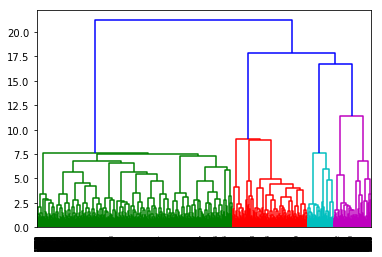

In [297]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(distance.pdist(data_macro))
dist_macro = scaler.transform(distance.pdist(data_macro))

scaler.fit(distance.pdist(data_macro))
dist_micro = scaler.transform(distance.pdist(data_micro))


dist = dist_macro-dist_micro*0
dist = dist-min(dist)
dist = distance.pdist(data_micro)
#dArray1 = distance.pdist(data, metric = 'chebyshev')
#print(dArray1)
result = linkage(dist, method='ward')
dendrogram(result)
show()

[[ 1 13]
 [ 1 13]
 [ 1 13]
 [ 1 13]
 [ 1 13]
 [ 1 13]]


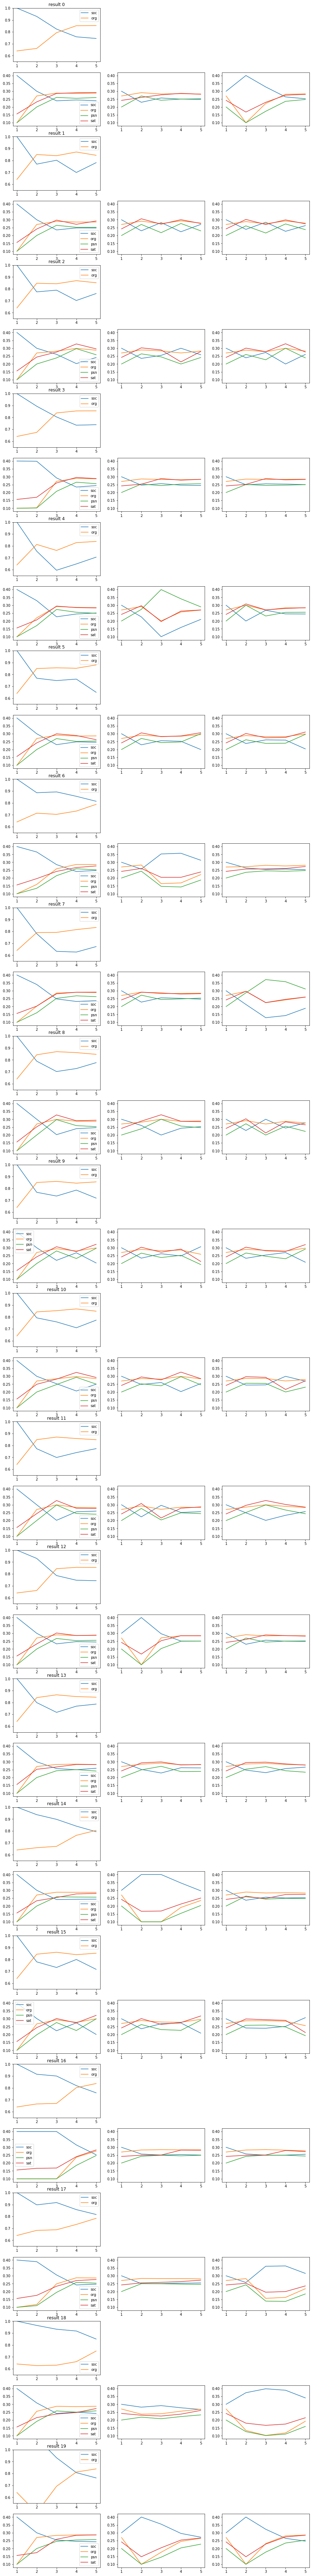

In [298]:
div_n = 20

joint_macro =  np.concatenate((data_macro, cut_tree(result, div_n)), axis=1)
joint_micro =  np.concatenate((data_micro, cut_tree(result, div_n)), axis=1)
joint_decision =  np.concatenate((data_decision, cut_tree(result, div_n)), axis=1)

check = np.concatenate((data_base[:,145:146], cut_tree(result, div_n)), axis=1).astype(np.int64)
print(check[check[:,0]==1])

plt.clf()
plt.figure(figsize=(15, 10*math.ceil(div_n)))


for n in range(div_n):

    joint_d = joint_macro[joint_macro[:,10]==n]
    plt.subplot(6*math.ceil(div_n/2), 3, 6*n+1)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[:5],label='soc')
    plt.plot(range(1,6),np.average(joint_d, axis=0)[5:10],label='org')
    plt.title("result " + str(n))
    plt.ylim(0.55,1.0)
    plt.legend()
    
    joint_d = joint_micro[joint_micro[:,75]==n]
    plt.subplot(6*math.ceil(div_n/2), 3, 6*n+4)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[0:5],label='soc')
    plt.plot(range(1,6),np.average(joint_d, axis=0)[5:10],label='org')
    plt.plot(range(1,6),np.average(joint_d, axis=0)[10:15],label='psn')
    plt.plot(range(1,6),np.average(joint_d, axis=0)[15:20],label='sat')
    plt.ylim(0.08,0.42)
    plt.legend()

    plt.subplot(6*math.ceil(div_n/2), 3, 6*n+5)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[25:30])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[30:35])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[35:40])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[40:45])
    plt.ylim(0.08,0.42)
    
    plt.subplot(6*math.ceil(div_n/2), 3, 6*n+6)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[50:55])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[55:60])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[60:65])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[65:70])
    plt.ylim(0.08,0.42)
    
    plt.xticks([1,2,3,4,5])
plt.show()




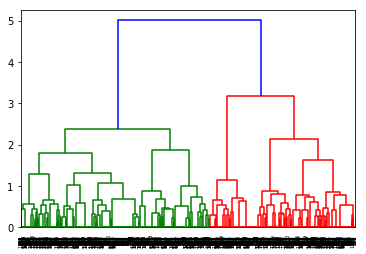

In [299]:
target_process = 13


data_macro = joint_macro[joint_macro[:,10]==target_process].astype(np.double)
data_micro = joint_micro[joint_micro[:,75]==target_process].astype(np.double)



result3 = linkage(data_macro[:,0:10], method='ward')
dendrogram(result3)
show()

check2 = check[check[:,1]==target_process]

0:54
1:111
2:46
3:49
4:83
5:35
6:79
7:71
8:80
9:60
10:63
11:107
12:40
13:61
14:52
15:37
16:92
17:76
18:89
19:32


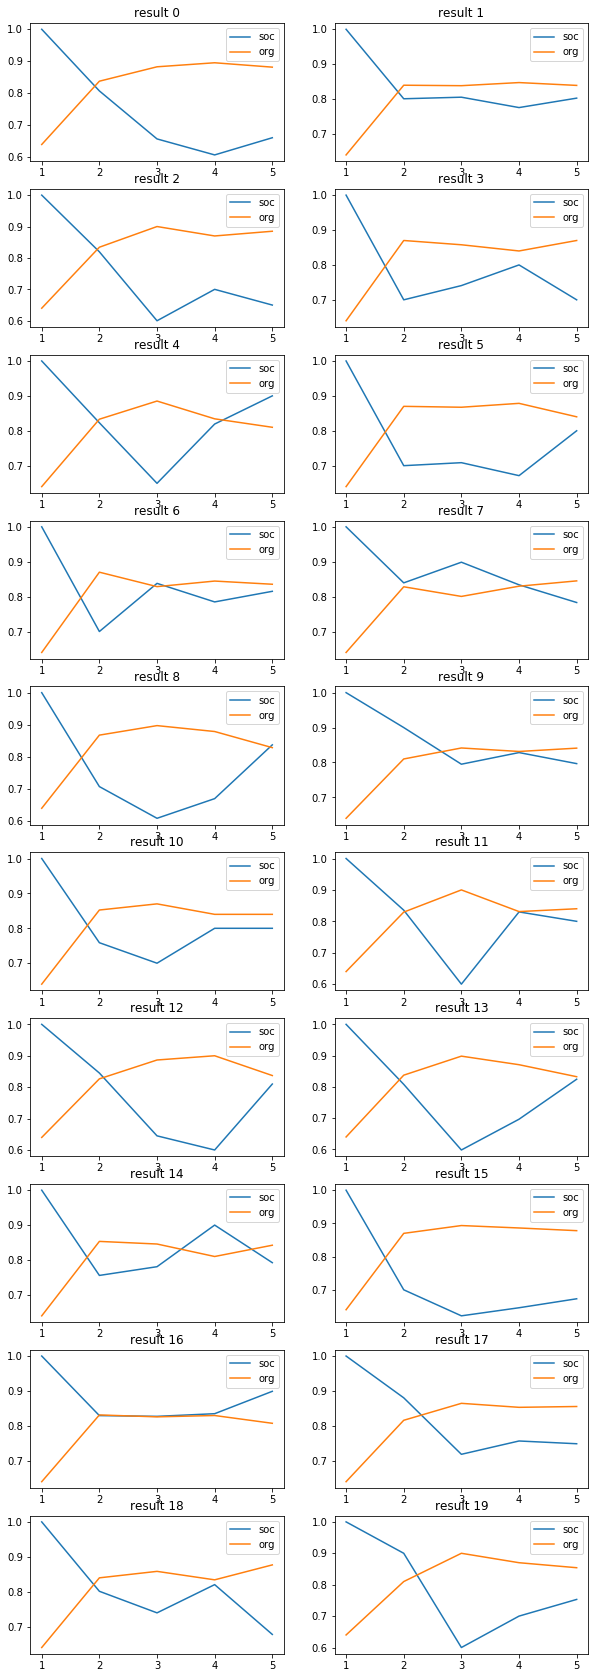

[[ 1 13 15]
 [ 1 13 15]
 [ 1 13 15]
 [ 1 13 15]
 [ 1 13 15]
 [ 1 13 15]]


In [300]:
#結果の分類
div_n2 = 20

np.set_printoptions(threshold=np.inf)
joint_macro2 = np.concatenate((data_macro, cut_tree(result3, div_n2)), axis=1)
joint_micro2 = np.concatenate((data_micro, cut_tree(result3, div_n2)), axis=1)

#np.where(joint[:,10]==0)
plt.clf()
plt.figure(figsize=(10, 3*math.ceil(div_n2/2)))

for n in range(div_n2):
    joint_d = joint_macro2[joint_macro2[:,11]==n]
    print(str(n) + ":" + str(len(joint_d)))
    plt.subplot(math.ceil(div_n2/2), 2, n+1)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[:5],label='soc')
    plt.plot(range(1,6),np.average(joint_d, axis=0)[5:10],label='org')
    plt.title("result " + str(n))
    plt.legend()
plt.show()

check2 = np.concatenate((check2, cut_tree(result3, div_n2)), axis=1).astype(np.int64)
print(check2[check2[:,0]==1])



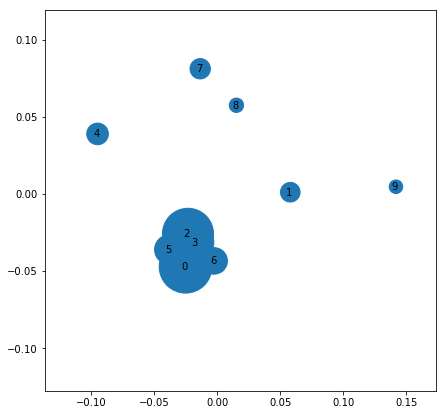

     , 0.10, 0.01, 0.03, 0.11, 0.03, 0.02, 0.13, 0.09, 0.18,
     ,     , 0.09, 0.08, 0.14, 0.09, 0.08, 0.08, 0.09, 0.07,
     ,     ,     , 0.00, 0.09, 0.03, 0.02, 0.10, 0.08, 0.18,
     ,     ,     ,     , 0.11, 0.02, 0.02, 0.11, 0.11, 0.16,
     ,     ,     ,     ,     , 0.11, 0.12, 0.10, 0.13, 0.23,
     ,     ,     ,     ,     ,     , 0.06, 0.13, 0.13, 0.15,
     ,     ,     ,     ,     ,     ,     , 0.12, 0.09, 0.16,
     ,     ,     ,     ,     ,     ,     ,     , 0.08, 0.18,
     ,     ,     ,     ,     ,     ,     ,     ,     , 0.19,
     ,     ,     ,     ,     ,     ,     ,     ,     ,     ,


In [84]:
from sklearn import manifold

data_macro_ave = []
data_micro_ave = []
mark_size = []
for n in range(div_n):
    joint_macro_d = joint_macro[joint_macro[:,10]==n]
    data_macro_ave.append(np.average(joint_macro_d, axis=0)[:10])
    mark_size.append(10000*(len(joint_macro_d)/len(joint_macro)))

    joint_micro_d = joint_micro[joint_micro[:,75]==n]
    data_micro_ave.append(np.average(joint_micro_d, axis=0)[:75])
    
dist_m = distance.pdist(data_macro_ave)-distance.pdist(data_micro_ave)*distance.pdist(data_micro_ave)
dist_m = dist_m-min(dist_m)


mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)

pos = mds.fit_transform(distance.squareform(dist_m))

plt.clf()
plt.figure(figsize=(7, 7))
plt.scatter(pos[:, 0], pos[:, 1],s=mark_size, marker = 'o')
 
for label, x, y in zip(range(div_n), pos[:, 0], pos[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (2, -5),
        textcoords = 'offset points', ha = 'right', va = 'bottom')
 
plt.show()

count = 0
for n in range(div_n):
    for m in range(n+1):
        print('     ,', end='')
        
    for l in range(div_n-n-1):
        print(" " + str(('%03.2f' % dist_m[count]))+',',end='')
        count = count+1
        
    print('')

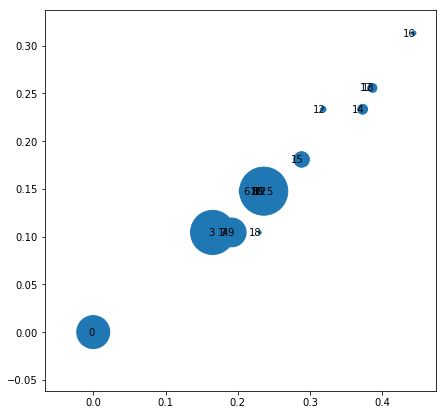

In [294]:
#ミクロマクロな距離
from sklearn import manifold

data_macro_ave = []
data_micro_ave = []
mark_size = []
for n in range(div_n):
    joint_macro_d = joint_macro2[joint_macro2[:,11]==n]
    data_macro_ave.append(np.average(joint_macro_d, axis=0)[:10])
    mark_size.append(10000*(len(joint_macro_d)/len(joint_macro2)))

    joint_micro_d = joint_micro2[joint_micro2[:,76]==n]
    data_micro_ave.append(np.average(joint_micro_d, axis=0)[:75])
    
dist_micro = distance.squareform(distance.pdist(data_micro_ave))
dist_macro = distance.squareform(distance.pdist(data_macro_ave))

plt.clf()
plt.figure(figsize=(7, 7))
plt.scatter(dist_micro[0], dist_macro[0],s=mark_size, marker = 'o')
 
for label, x, y in zip(range(div_n), dist_micro[0], dist_macro[0]):
   plt.annotate(
       label,
       xy = (x, y), xytext = (2, -5),
       textcoords = 'offset points', ha = 'right', va = 'bottom')
plt.show()


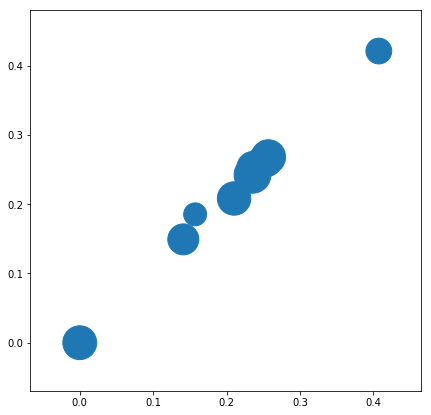

In [88]:
#社会効用、組織効用の距離
from sklearn import manifold

data_macro1_ave = []
data_macro2_ave = []
mark_size = []
for n in range(div_n):
    joint_macro_d = joint_macro2[joint_macro2[:,11]==n]
    data_macro_ave1.append(np.average(joint_macro_d, axis=0)[:10])
    mark_size.append(10000*(len(joint_macro_d)/len(joint_macro2)))

    joint_micro_d = joint_micro2[joint_micro2[:,76]==n]
    data_micro_ave.append(np.average(joint_micro_d, axis=0)[:75])
    
dist_micro = distance.squareform(distance.pdist(data_micro_ave))
dist_macro = distance.squareform(distance.pdist(data_macro_ave))

plt.clf()
plt.figure(figsize=(7, 7))
plt.scatter(dist_micro[0], dist_macro[0],s=mark_size, marker = 'o')
 
for label, x, y in zip(range(div_n), dist_micro[0], dist_macro[0]):
   plt.annotate(
       label,
       xy = (x, y), xytext = (2, -5),
       textcoords = 'offset points', ha = 'right', va = 'bottom')
plt.show()


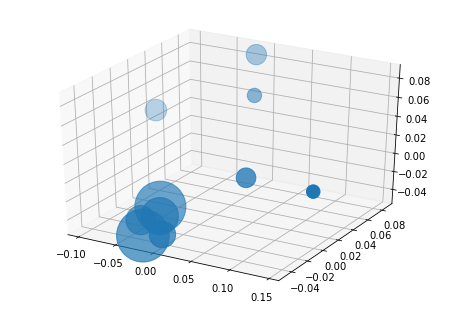

In [73]:
from matplotlib import pyplot
import pylab
from mpl_toolkits.mplot3d import Axes3D
import random
plt.clf()


fig = pylab.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = [1,2,3]
sequence_containing_y_vals = [4,5,6]
sequence_containing_z_vals = [7,8,9]

random.shuffle(sequence_containing_x_vals)
random.shuffle(sequence_containing_y_vals)
random.shuffle(sequence_containing_z_vals)

ax.scatter(pos[:, 0], pos[:, 1], pos[:, 1],s=mark_size, marker = 'o')
pyplot.show()

In [283]:
#ミクロ状態空間、マクロ状態空間のギャップでのクラスタ

import numpy as np
import mysql.connector
import scipy.signal as signal
from matplotlib.pyplot import show
import matplotlib.pyplot as plt
import scipy
import scipy.spatial.distance as distance
from scipy.cluster.hierarchy import linkage, dendrogram, ward,cut_tree
from random import random
import math
from sklearn import manifold
#np.set_printoptions(threshold=np.inf)

connector = mysql.connector.connect(host='localhost',db='agent_analysis',user='root',password='admin')
cursor = connector.cursor(buffered=True)

sql = "SELECT * FROM hand_simu_logs"



num=cursor.execute(sql)
data_base = np.array(cursor.fetchall())
data_macro = data_base[:,135:145].astype(np.double)
data_micro = np.concatenate((data_base[:,20:45], data_base[:,65:90],data_base[:,110:135]), axis=1).astype(np.double)
data_decision = np.concatenate((data_base[:,15:20], data_base[:,60:65],data_base[:,105:110]), axis=1).astype(np.str)

cursor.close()
connector.close()




C:\Users\e02324\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\e02324\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\e02324\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Re

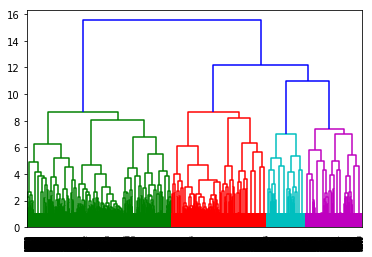

In [284]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(distance.pdist(data_macro))
#dist_macro = scaler.transform(distance.pdist(data_macro))

#scaler.fit(distance.pdist(data_macro))
#dist_micro = scaler.transform(distance.pdist(data_micro))+1

from sklearn.preprocessing import MinMaxScaler
mms1 = MinMaxScaler()
dist_macro = mms1.fit_transform(distance.pdist(data_macro))

mms2 = MinMaxScaler()
dist_micro = mms2.fit_transform(distance.pdist(data_micro))


dist = (dist_macro+1) *(1-dist_micro*dist_micro)
dist = dist-min(dist)
#dArray1 = distance.pdist(data, metric = 'chebyshev')
#print(dArray1)
result = linkage(dist, method='ward')
dendrogram(result)
show()

[[1 3]
 [1 3]
 [1 3]
 [1 3]
 [1 3]
 [1 3]]


C:\Users\e02324\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


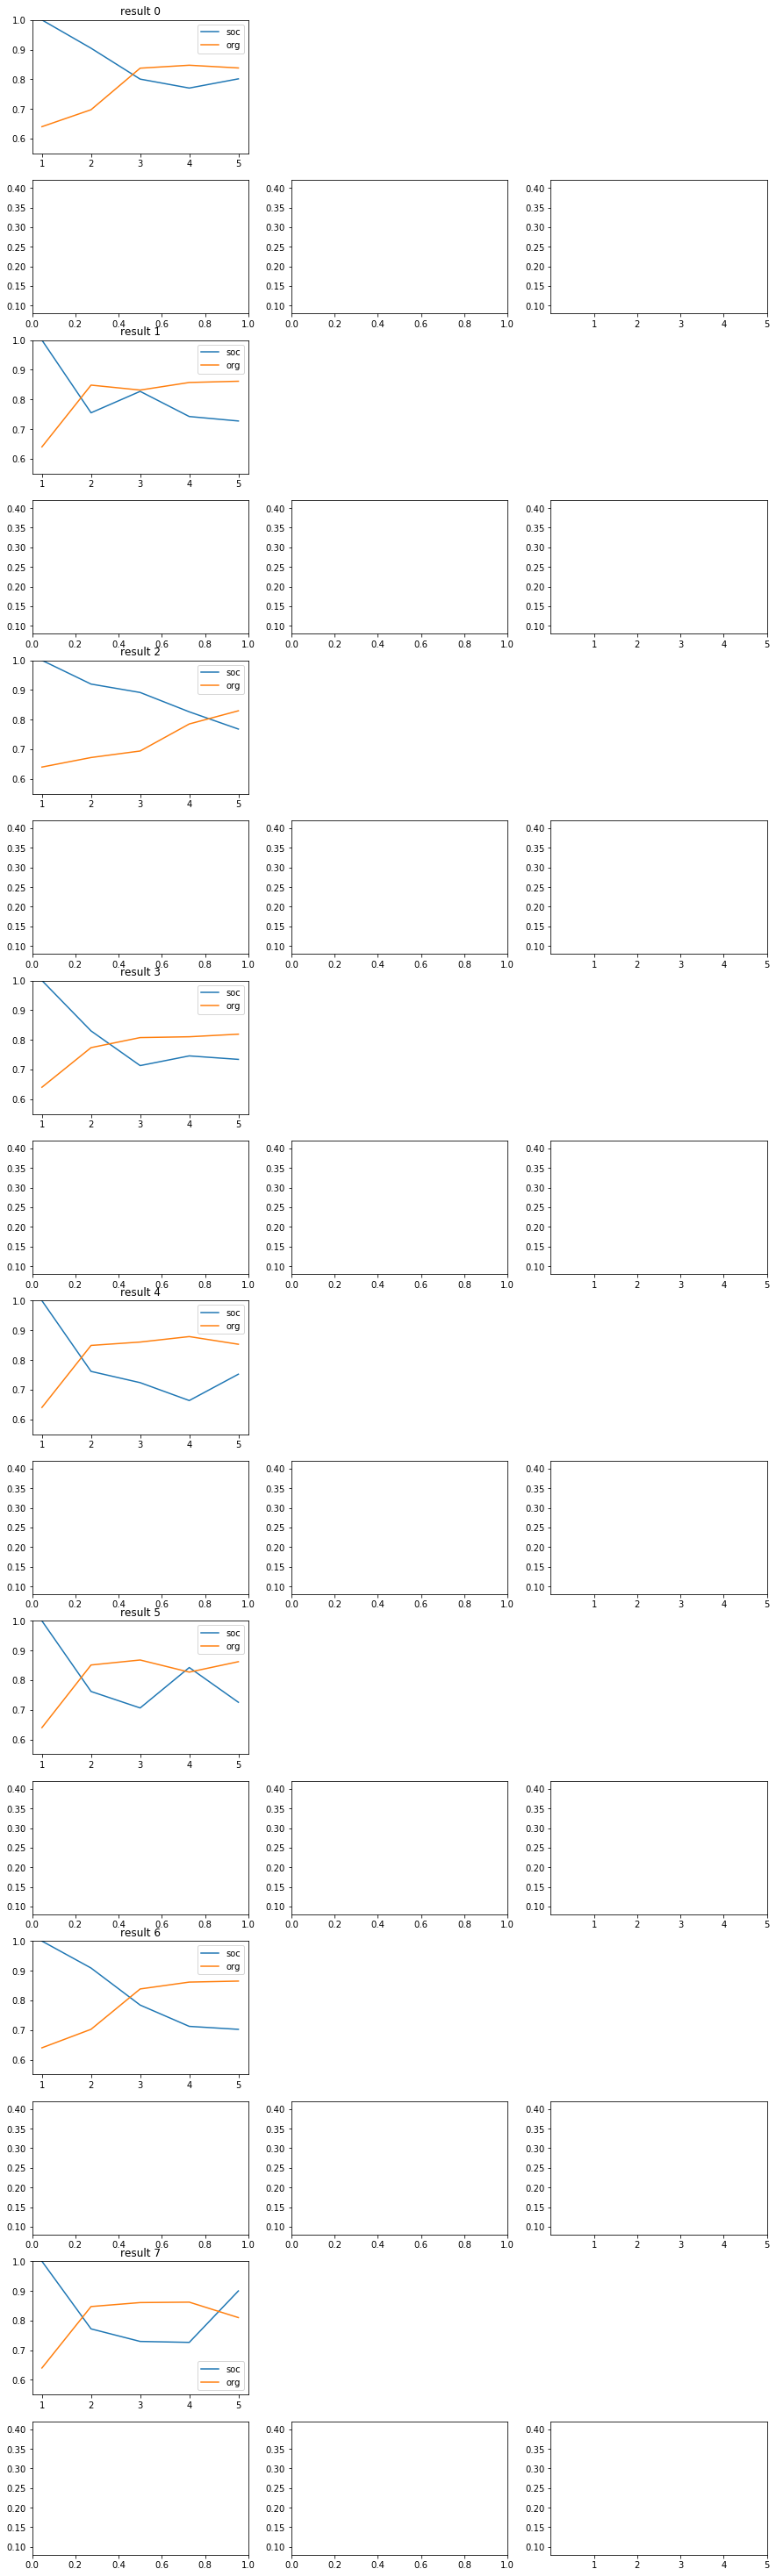

In [287]:
div_n = 8

joint_macro =  np.concatenate((data_macro, cut_tree(result, div_n)), axis=1)
joint_micro =  np.concatenate((data_micro, cut_tree(result, div_n)), axis=1)
joint_decision =  np.concatenate((data_decision, cut_tree(result, div_n)), axis=1)

check = np.concatenate((data_base[:,145:146], cut_tree(result, div_n)), axis=1).astype(np.int64)
target = check[check[:,0]==1][0,1]
print(check[check[:,0]==1])

plt.clf()
plt.figure(figsize=(15, 10*math.ceil(div_n)))


for n in range(div_n):

    joint_d = joint_macro[joint_macro[:,10]==n]
    plt.subplot(6*math.ceil(div_n/2), 3, 6*n+1)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[:5],label='soc')
    plt.plot(range(1,6),np.average(joint_d, axis=0)[5:10],label='org')
    plt.title("result " + str(n))
    plt.ylim(0.55,1.0)
    plt.legend()
    
    joint_d = joint_micro[joint_micro[:,75]==n]
    plt.subplot(6*math.ceil(div_n/2), 3, 6*n+4)
#    plt.plot(range(1,6),np.average(joint_d, axis=0)[0:5],label='soc')
#    plt.plot(range(1,6),np.average(joint_d, axis=0)[5:10],label='org')
#    plt.plot(range(1,6),np.average(joint_d, axis=0)[10:15],label='psn')
#    plt.plot(range(1,6),np.average(joint_d, axis=0)[15:20],label='sat')
    plt.ylim(0.08,0.42)
    plt.legend()

    plt.subplot(6*math.ceil(div_n/2), 3, 6*n+5)
#    plt.plot(range(1,6),np.average(joint_d, axis=0)[25:30])
#    plt.plot(range(1,6),np.average(joint_d, axis=0)[30:35])
#    plt.plot(range(1,6),np.average(joint_d, axis=0)[35:40])
#    plt.plot(range(1,6),np.average(joint_d, axis=0)[40:45])
    plt.ylim(0.08,0.42)
    
    plt.subplot(6*math.ceil(div_n/2), 3, 6*n+6)
#    plt.plot(range(1,6),np.average(joint_d, axis=0)[50:55])
#    plt.plot(range(1,6),np.average(joint_d, axis=0)[55:60])
#    plt.plot(range(1,6),np.average(joint_d, axis=0)[60:65])
#    plt.plot(range(1,6),np.average(joint_d, axis=0)[65:70])
    plt.ylim(0.08,0.42)
    
    plt.xticks([1,2,3,4,5])
plt.show()




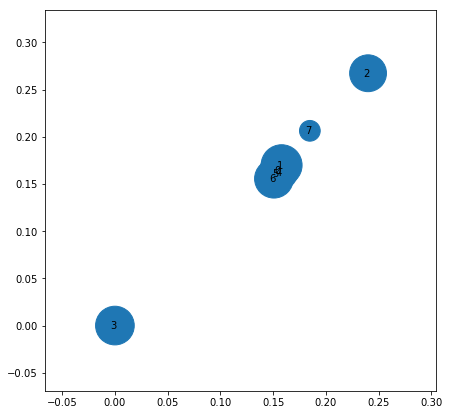

In [288]:
from sklearn import manifold

data_macro_ave = []
data_micro_ave = []
mark_size = []
for n in range(div_n):
    joint_macro_d = joint_macro[joint_macro[:,10]==n]
    data_macro_ave1.append(np.average(joint_macro_d, axis=0)[:5])
    data_macro_ave2.append(np.average(joint_macro_d, axis=0)[5:10])
    mark_size.append(10000*(len(joint_macro_d)/len(joint_macro)))

    
dist_micro = distance.squareform(distance.pdist(data_micro_ave))
dist_macro = distance.squareform(distance.pdist(data_macro_ave))

plt.clf()
plt.figure(figsize=(7, 7))
plt.scatter(dist_micro[target], dist_macro[target],s=mark_size, marker = 'o')
 
for label, x, y in zip(range(div_n), dist_micro[target], dist_macro[target]):
   plt.annotate(
       label,
       xy = (x, y), xytext = (2, -5),
       textcoords = 'offset points', ha = 'right', va = 'bottom')
plt.show()
